## This is the face mask detector.

The following code utilizes Faster R-CNN in order to perform object detection and detec face masks on people in a picture.

### Store image's directory into a list¶

In [112]:
#retrieve image imformation
import os
image_directories = []
for dirname, _, filenames in os.walk('archive/images/'):
    for filename in filenames:
        image_directories.append(os.path.join(dirname, filename))

### Create Dataframe based on image's found in XML

In [113]:
import xml.etree.ElementTree as et
import re
import pandas as pd
import matplotlib.pyplot as plt

dic = {"image": [],"Dimensions": []}
for i in range(1,116):
	dic[f'Object {i}']=[]
print("Generating data in CSV format....")

img_elem = []
img_count = []

for file in os.listdir("archive/annotations"):
    row = []
    xml = et.parse("archive/annotations/"+file) 
    root = xml.getroot()
    
    img = root[1].text
    row.append(img)
    
    num_img = int(img[12:-4])
    img_count.append(num_img)
    
    h,w = root[2][0].text,root[2][1].text
    count = 0
    row.append([h,w])
    temp_img = []
    for i in range(4,len(root)):
        temp = []
        if root[i][0].text != "mask_weared_incorrect":
            
            temp.append(root[i][0].text)
            count +=1
    #         print(root[i][0].text)
            temp_img.append(root[i][0].text) 
            for point in root[i][5]:
                temp.append(point.text)
            row.append(temp)
#     img_elem.append(temp_img)
    img_elem.append(count)
    
    for i in range(len(row),119):
        row.append(0)
    for i,each in enumerate(dic):
        dic[each].append(row[i])
#Main data
df = pd.DataFrame(dic)
#bounding box information for understanding data
df2 = pd.DataFrame(img_elem)

Generating data in CSV format....


In [114]:
df

,image,Dimensions,Object 1,Object 2,Object 3,Object 4,Object 5,Object 6,Object 7,Object 8,...,Object 106,Object 107,Object 108,Object 109,Object 110,Object 111,Object 112,Object 113,Object 114,Object 115
0,maksssksksss0.png,"[512, 366]","[without_mask, 79, 105, 109, 142]","[with_mask, 185, 100, 226, 144]","[without_mask, 325, 90, 360, 141]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,maksssksksss1.png,"[400, 156]","[with_mask, 321, 34, 354, 69]","[with_mask, 224, 38, 261, 73]","[with_mask, 299, 58, 315, 81]","[with_mask, 143, 74, 174, 115]","[with_mask, 74, 69, 95, 99]","[with_mask, 191, 67, 221, 93]","[with_mask, 21, 73, 44, 93]","[with_mask, 369, 70, 398, 99]",...,0,0,0,0,0,0,0,0,0,0
2,maksssksksss10.png,"[301, 400]","[with_mask, 98, 267, 194, 383]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,maksssksksss100.png,"[400, 226]","[with_mask, 189, 30, 245, 88]","[with_mask, 387, 54, 400, 75]","[with_mask, 118, 87, 163, 126]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,maksssksksss101.png,"[301, 400]","[with_mask, 48, 294, 164, 400]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,maksssksksss102.png,"[400, 225]","[with_mask, 212, 57, 251, 106]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,maksssksksss103.png,"[400, 300]","[with_mask, 42, 54, 94, 110]","[with_mask, 188, 46, 236, 106]","[with_mask, 261, 88, 303, 130]","[with_mask, 368, 112, 400, 151]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,maksssksksss104.png,"[400, 267]","[without_mask, 42, 109, 66, 140]","[without_mask, 2, 105, 22, 125]","[without_mask, 30, 88, 46, 105]","[with_mask, 133, 108, 174, 152]","[with_mask, 221, 101, 256, 139]","[without_mask, 304, 131, 331, 158]","[without_mask, 83, 85, 96, 96]","[without_mask, 167, 91, 180, 108]",...,0,0,0,0,0,0,0,0,0,0
8,maksssksksss105.png,"[400, 267]","[with_mask, 178, 143, 213, 202]","[with_mask, 280, 103, 312, 145]","[with_mask, 320, 79, 352, 119]","[with_mask, 365, 53, 390, 84]","[with_mask, 243, 36, 267, 67]","[with_mask, 115, 47, 146, 87]","[with_mask, 33, 88, 65, 131]","[with_mask, 29, 202, 65, 265]",...,0,0,0,0,0,0,0,0,0,0
9,maksssksksss106.png,"[600, 399]","[with_mask, 154, 51, 423, 391]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Cleaning Data

#### Remove pictures with "mask_weared_incorrect"

In [115]:
#Removes any pictures that formerly only had the "mask_weared_incorrect" label
for i in df.index.values:
    if isinstance(df["Object 1"][i], int):
        df = df.drop(i)

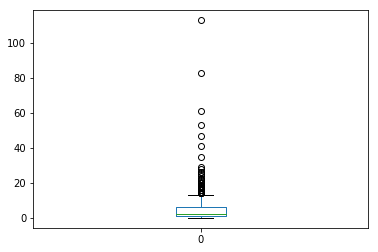

In [116]:
df2.plot.box()

#### Remove any images with greater than 40 bounding boxes

In [117]:
#Removes any images containing 40 or more bounding boxes
seriesObj = df2.apply(lambda x: True if x[0] < 40 else False, axis=1)
# print(type(seriesObj))
# print(len(df))

index = seriesObj[seriesObj == False].index.values
# print(list(index))
df = df.drop(index=list(index))
df2 = df2.drop(index=list(index))
# print(len(df))

#Removes extra columns
for i in range (40, 116):
    col_name = "Object "+ str(i)
    df.pop(col_name)


##### Frequency of Bounding Boxes

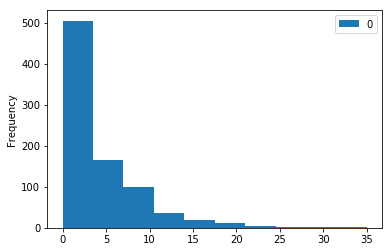

In [118]:
df2.plot.hist()

### Reformat DF to Bounding Box entry DF

In [150]:
bb_dict = {"Image": [], "XMin": [], "XMax": [], "YMin": [], "YMax": [], "ClassName": []}

for row in df.index.values:
    j = 0
    for col in df.columns:
        if (j < 2):
            j += 1
            continue
        if (df[col][row] == 0):
            break
        x, y = df["Dimensions"][row]
        x = int(x)
        y = int(y)
        bb_dict["Image"].append(df["image"][row])
        bb_dict["ClassName"].append(df[col][row][0])
        x1 = int(df[col][row][1])
        x2 = int(df[col][row][3])
        y1 = int(df[col][row][2])
        y2 = int(df[col][row][4])
        
        bb_dict["XMin"].append(x1)
        bb_dict["XMax"].append(x2)
        bb_dict["YMin"].append(y1)
        bb_dict["YMax"].append(y2)

bb_df = pd.DataFrame(bb_dict)

In [151]:
bb_df

,Image,XMin,XMax,YMin,YMax,ClassName
0,maksssksksss0.png,79,109,105,142,without_mask
1,maksssksksss0.png,185,226,100,144,with_mask
2,maksssksksss0.png,325,360,90,141,without_mask
3,maksssksksss1.png,321,354,34,69,with_mask
4,maksssksksss1.png,224,261,38,73,with_mask
5,maksssksksss1.png,299,315,58,81,with_mask
6,maksssksksss1.png,143,174,74,115,with_mask
7,maksssksksss1.png,74,95,69,99,with_mask
8,maksssksksss1.png,191,221,67,93,with_mask
9,maksssksksss1.png,21,44,73,93,with_mask


### Print Bounding Box Function

In [152]:
import matplotlib.image as mplib
import matplotlib.pyplot as plt
import cv2


def plot_bbox(img_name):
    img = mplib.imread('archive/images/' + img_name)
#     plt.imshow(img)
    height, width, channel = img.shape
#     print(height, width)
    bboxs = []
    for i in range(0, len(bb_dict["Image"])):
        if (bb_dict["Image"][i] == img_name):
            bboxs.append({"Image": bb_dict["Image"][i], "XMin": bb_dict["XMin"][i], "XMax": bb_dict["XMax"][i], "YMin": bb_dict["YMin"][i], "YMax": bb_dict["YMax"][i], "ClassName": bb_dict["ClassName"][i]})
    for row in bboxs:
#         print(row)
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        xmin = int(xmin)
        xmax = int(xmax)
        ymin = int(ymin)
        ymax = int(ymax)
#         print(xmin, xmax, ymin, ymax)
        label_name = row['ClassName']
        cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (1,0,0), 2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, label_name, (xmin,ymin-10), font, 0.25, (0,1,0), 1)
    plt.figure(figsize=(15,10))
    plt.title('Image with Bounding Box')
    plt.imshow(img)
#     plt.axis("off")
    plt.show()

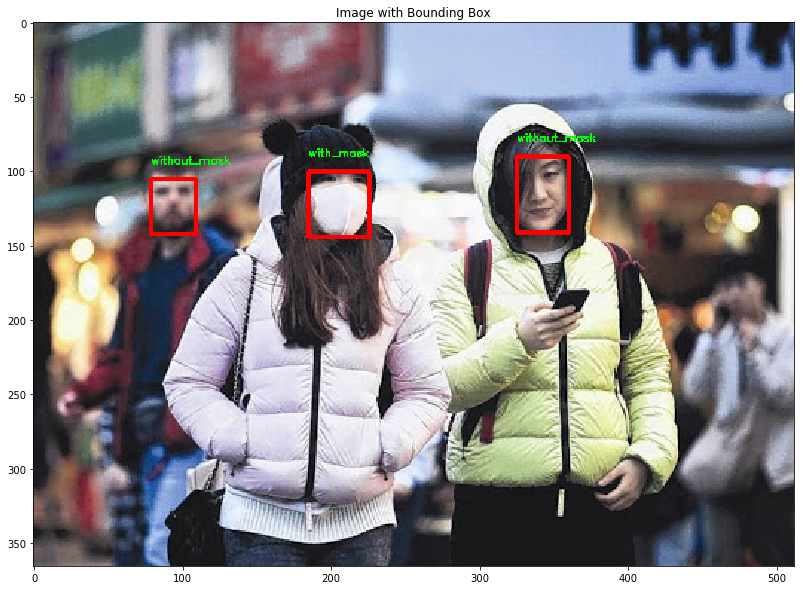

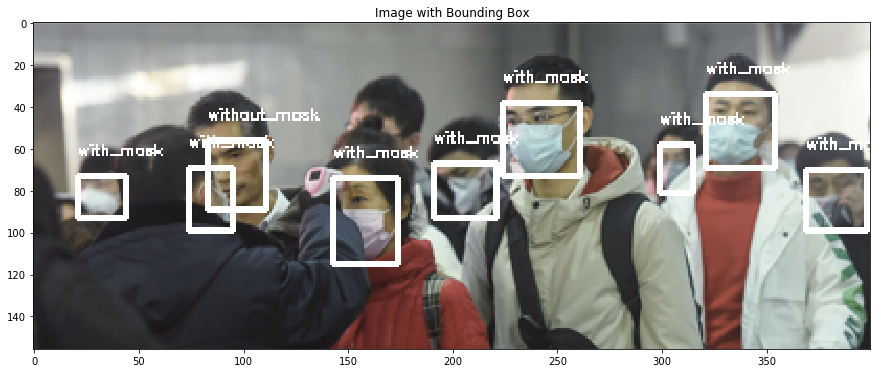

In [153]:
plot_bbox("maksssksksss0.png")
plot_bbox("maksssksksss1.png")

### Padding

In [12]:
# with_mask = 0
# wo_mask = 0
# bad_mask = 0
# for row in df2.index.values:
#     for col in df2.columns:
#         with_mask += 1 if df2[col][row] == "with_mask" else 0
#         wo_mask += 1 if df2[col][row] == "without_mask" else 0
#         bad_mask += 1 if df2[col][row] == "mask_weared_incorrect" else 0

# print(with_mask/ (with_mask+wo_mask+bad_mask))
# print(wo_mask/(with_mask+wo_mask+bad_mask))
# print(bad_mask/(with_mask+wo_mask+bad_mask))
    

In [155]:
# df

,image,Dimensions,Object 1,Object 2,Object 3,Object 4,Object 5,Object 6,Object 7,Object 8,...,Object 30,Object 31,Object 32,Object 33,Object 34,Object 35,Object 36,Object 37,Object 38,Object 39
0,maksssksksss299.png,"[301, 400]","[without_mask, 62, 194, 160, 320]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,maksssksksss528.png,"[301, 400]","[without_mask, 43, 169, 149, 308]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,maksssksksss514.png,"[400, 267]","[with_mask, 28, 78, 43, 99]","[with_mask, 160, 66, 176, 83]","[with_mask, 174, 33, 186, 52]","[with_mask, 202, 40, 216, 59]","[without_mask, 237, 41, 248, 58]","[with_mask, 298, 38, 311, 54]","[with_mask, 333, 51, 346, 70]","[with_mask, 375, 47, 386, 63]",...,0,0,0,0,0,0,0,0,0,0
4,maksssksksss500.png,"[301, 400]","[with_mask, 113, 230, 216, 368]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,maksssksksss266.png,"[301, 400]","[with_mask, 74, 205, 180, 330]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,maksssksksss243.png,"[301, 400]","[with_mask, 112, 93, 206, 219]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
849,maksssksksss531.png,"[301, 400]","[with_mask, 92, 201, 172, 322]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
850,maksssksksss257.png,"[400, 267]","[with_mask, 4, 106, 42, 163]","[with_mask, 41, 114, 88, 163]","[with_mask, 101, 95, 143, 146]","[with_mask, 102, 17, 144, 58]","[without_mask, 24, 23, 61, 56]","[with_mask, 193, 44, 232, 95]","[with_mask, 362, 89, 399, 142]","[with_mask, 342, 34, 379, 71]",...,0,0,0,0,0,0,0,0,0,0
851,maksssksksss280.png,"[400, 267]","[with_mask, 25, 54, 43, 72]","[with_mask, 69, 25, 82, 38]","[with_mask, 94, 68, 111, 84]","[with_mask, 142, 18, 155, 30]","[with_mask, 158, 31, 174, 48]","[with_mask, 197, 84, 218, 107]","[with_mask, 175, 15, 190, 30]","[with_mask, 201, 18, 215, 32]",...,0,0,0,0,0,0,0,0,0,0


##### Find Max Height and Width for Padding

In [155]:
max_x = 0
max_y = 0
lengths = []
widths = []
for index in df.index.values:
    max_x = int(df["Dimensions"][index][0]) if int(df["Dimensions"][index][0]) > max_x else max_x
    lengths.append(int(df["Dimensions"][index][0]))
    max_y = int(df["Dimensions"][index][1]) if int(df["Dimensions"][index][1]) > max_y else max_y
    widths.append(int(df["Dimensions"][index][1]))
print(max_x, max_y)

600 600


##### Add Padding

In [168]:

import cv2
import matplotlib.image as mplib
import matplotlib.pyplot as plt

#This includes ideal padding for images, however we need to find a way to adjust each bounding box accordingly 
for i in df.index.values:
    img = mplib.imread(image_directories[i])
#     print("before: ", img)
    Y, X = df["Dimensions"][i]
    Y = int(Y)
    X = int(X)
#     print(max_x-int(X), max_y-int(Y))
    new_img = img
    new_img = cv2.copyMakeBorder(new_img, 0, max_x - X, 0, max_y - Y, cv2.BORDER_CONSTANT)

#     plt.imsave('archive/padded_images/' + df["image"][i], new_img)
    break
    
    
#     if (max_y-int(Y)) <  (max_x-int(X)):
#         new_x = max_y - int(Y)+int(X)
#         new_img = cv2.resize(img, (new_x, max_y))
# #         print(new_x)
#         new_img = cv2.copyMakeBorder(new_img, 0, 0, 0, max_x - new_x, cv2.BORDER_CONSTANT)
#     elif (max_y-int(Y)) >  (max_x-int(X)):
#         new_y = max_x - int(X)+int(Y)
#         new_img = cv2.resize(img, (max_x, new_y))
#         new_img = cv2.copyMakeBorder(new_img, 0, max_y-new_y, 0, 0, cv2.BORDER_CONSTANT)
# #     print(max_x-(max_y - int(X)+int(Y)))
# #     if max_x-(max_y - int(X)+int(Y)) > 0:
#         new_img = cv2.copyMakeBorder(img, 0, 0, 0,max_x-(max_y - int(X)+int(Y)), cv2.BORDER_CONSTANT)
#     else:
#         new_img = cv2.copyMakeBorder(img, 0, max_y - max_x - , 0, max_x - max_y-int(X), cv2.BORDER_CONSTANT)
#     plt.imshow(mpl_img)

(600, 600, 3)


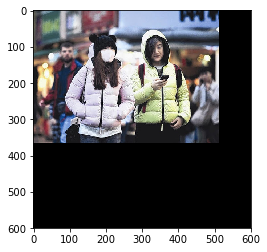

In [169]:
print(new_img.shape)
plt.imshow(new_img)

In [16]:
# import matplotlib.patches as patches

# img_arr = []

# for i in df.index.values:
# #     print(image_directories[i])
#     img = mplib.imread(os.path.join("archive/images/", df["image"][i]))
#     fig,ax = plt.subplots(1)

#     # Display the image
    
    
# #     print("before: ", img)
#     X, Y = df["Dimensions"][i]
#     img = cv2.copyMakeBorder(img, 0, max_y - int(Y), 0, max_x-int(X), cv2.BORDER_CONSTANT)
#     print(i)
#     ax.imshow(img)
#     first_box = df["Object 1"][i]
#     if isinstance(first_box, list) :
# #         print(first_box[1])
#         x_min = first_box[1]
#         y_min = first_box[2]
#         x_max = first_box[3]
#         y_max = first_box[4]
#         rect = patches.Rectangle((int(x_min),int(y_min)),
#                                  int(x_max)-int(x_min),
#                                  int(y_max)-int(y_min),
#                                  linewidth=1,edgecolor='r',facecolor='none')

#         # Add the patch to the Axes
#         ax.add_patch(rect)
#         img_arr.append(img)

In [17]:
# img.shape

In [23]:
# from sklearn.decomposition import PCA
# import numpy as np

# img = img_arr[3]
# reshaped_img = np.reshape(img, (img.shape[0], img.shape[1]*img.shape[2]))

# v = []
# for i in range(1, 40, 3):
#     sum = 0
#     for img in img_arr:
#         img = img_arr[i]
#         reshaped_img = np.reshape(img, (img.shape[0], img.shape[1]*img.shape[2]))
        
#         pca = PCA(i).fit(reshaped_img) 
#         img_transformed = pca.transform(reshaped_img)
#         sum += np.sum(pca.explained_variance_ratio_)
#     v.append(sum/len(img_arr))
# temp = pca.inverse_transform(img_transformed) 
# print(temp.shape)
# temp = np.reshape(temp, (600,600 ,4)) 
# print(temp.shape) 
# plt.imshow(temp)

In [24]:
# import numpy as np

# variances = np.array(v)
# print(v)
# fig, ax = plt.subplots(figsize =(10, 7))
# ax.plot(range(1, 40, 3), v, marker='o')
# ax.set_xlabel("Principle Components")
# ax.set_ylabel("Variance")
# ax.set_title("Variance for Various Principle Component Values in PCA")

### PCA

In [25]:
# reshaped_img = np.reshape(img_arr[3], (img.shape[0], img.shape[1]*img.shape[2]))
        
# pca = PCA(18).fit(reshaped_img) 
# img_transformed = pca.transform(reshaped_img)
# print(np.sum(pca.explained_variance_ratio_))

# temp = pca.inverse_transform(img_transformed) 
# print(temp.shape)
# temp = np.reshape(temp, (600,600 ,4)) 
# print(temp.shape) 
# plt.imshow(temp)

In [26]:
# plt.imshow(img)